# Logistic Regression

### Importing Libraries

In [0]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [69]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [70]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [0]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [74]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Implementing Logistic Regression

In [0]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [77]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [78]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [79]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7485148514851485


In [80]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.7500000000000001


### Making predictions using *predict_proba* function

In [81]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.50532331, 0.49467669],
       [0.90358566, 0.09641434],
       [0.87905533, 0.12094467],
       ...,
       [0.2318093 , 0.7681907 ],
       [0.31396139, 0.68603861],
       [0.04488945, 0.95511055]])

In [82]:
train_preds = train_predict[:,1]
train_preds

array([0.49467669, 0.09641434, 0.12094467, 0.78269614, 0.63158872,
       0.11959961, 0.82765257, 0.7683714 , 0.52316428, 0.08819509,
       0.1090379 , 0.0883493 , 0.12710626, 0.09929288, 0.60742308,
       0.08735934, 0.30854448, 0.12325226, 0.07440999, 0.28061931,
       0.10585236, 0.21134153, 0.07037293, 0.59759559, 0.09323393,
       0.52618686, 0.08819857, 0.55834168, 0.59353543, 0.13131481,
       0.81433078, 0.08838533, 0.58424898, 0.12972101, 0.01941746,
       0.59135528, 0.21086379, 0.13152659, 0.06123531, 0.27460277,
       0.84284749, 0.39026594, 0.20569086, 0.71795561, 0.48472512,
       0.94248268, 0.35733836, 0.23520213, 0.1737895 , 0.89340115,
       0.13552776, 0.6395987 , 0.23012338, 0.60033766, 0.34034319,
       0.64464168, 0.77324414, 0.28159562, 0.11224533, 0.30456352,
       0.59461444, 0.28159562, 0.13033402, 0.4551247 , 0.10073283,
       0.97659391, 0.12001885, 0.0883493 , 0.85823999, 0.67783378,
       0.93271443, 0.7563801 , 0.89304445, 0.44658035, 0.83485

In [0]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  

In [84]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7428571428571429


# Confusion matrix

In [85]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[128  16]
 [ 22  57]]


In [86]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.78      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



# Parameters of Logistic Regression

In [87]:
# printing the coefficients
logreg.coef_

array([[-0.03483328,  0.00290015,  0.9995268 ,  0.09486387, -1.05437905,
         1.17493827, -1.13492666,  0.87606757,  1.0844905 ,  0.48118362,
        -0.58818134, -0.80578005, -0.43078847, -0.57698021,  0.23067525,
         0.68993538, -0.08309876,  0.31876761, -0.5964179 , -0.19446201,
        -0.32538794,  0.16857516,  0.15122525, -0.27978879]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

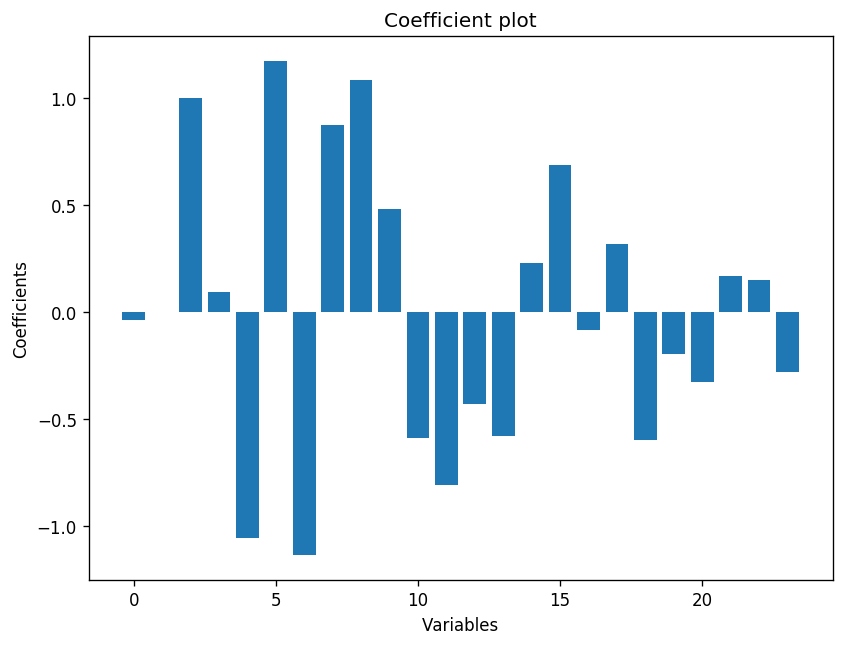

In [88]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [89]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.034833
1,Fare,0.002900
2,Pclass_1,0.999527
3,Pclass_2,0.094864
4,Pclass_3,1.054379


In [108]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3)

SyntaxError: ignored

In [109]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [0]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [111]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making predictions using *predict* function

In [112]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7076923076923077


Text(0.5, 1.0, 'Coefficient plot')

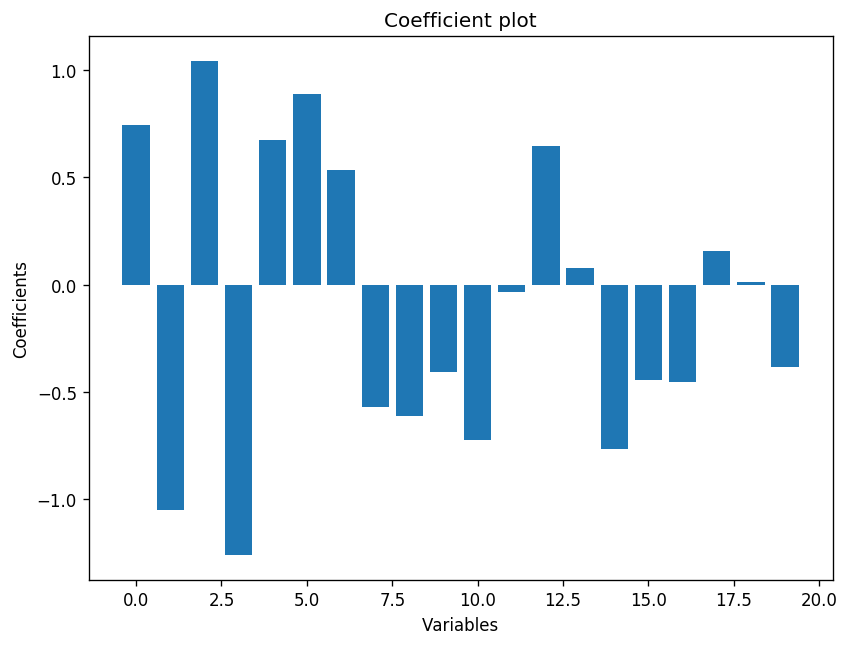

In [113]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')